## <div style="text-align: right"> Mayank Pathak </div>
# Problem Set 3
## Question 3 
### Classifying Three Meter Dataset 

### October 20, 2018

- 1. **Introduction** 
    - 1.1 Importing Necessary libraries
    - 1.2 Defining Hyper-Parameters
- 2. **Data Preparation**
    - 2.1  Load Data
    - 2.2  Reshaping Input Images
    - 2.3  Normalize Images 
    - 2.4  Show Sample Training Images and Labels
- 3. **Neural Network**
    - 3.1 Define Activation Function 
    - 3.2 Define the Model
    - 3.3 Set the optimizer
    - 3.4 Fit the Training Data
- 4. **Evaluate Model**
    - 4.1 Evaluate the network with test data
    - 4.2 Plot Accuracy and Loss curves

### 1. Introduction
Auto Encoder is implemented to classify the given csv data file. This model consists of a Symmetrical Network combining an Encoder and Decoder.

#### 1.1 Importing necessary libraries:
Libraries used for to create this network:
    1. numpy
    2. matplotlib
    3. torch
    4. sklearn
    5. torch vision
    6. os

In [237]:
import sys
import torch
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from torch import nn
from torch import autograd
import torch.utils.data as Data
import matplotlib.pyplot as plt

%matplotlib inline

#### 1.2 Defining Hyper-Parameters and other required Parameters
The Hyper-Parameters for this model are:

    1. batch size
    2. learning rate
    3. weight decay
    4. epochs
    5. optimizer

In [217]:
# parameters
batch_size = 1000
learning_rate = 0.01
weight_decay = 0.5
num_epochs = 200


### 2. Data Preparation

#### 2.1 Load Data
The input data is loaded from the given csv file using pandas. <br>

 > Shape of Input Data : 32282 x 33 <br>

In [218]:
data= pd.read_csv("Three Meter/data.csv")

The input data table looks as below:

In [239]:
data

,4.7547,4.5561,4.5738,4.5007,4.4813,4.5559,4.4415,4.4804,4.6223,4.4574,...,4.6228,4.6313,4.6563,4.5482,4.5666,4.665,4.6196,4.6131,4.3299,4.7383
0,4.7554,4.5558,4.5731,4.5003,4.4826,4.5563,4.4418,4.4799,4.6216,4.4566,...,4.6222,4.6309,4.6562,4.5479,4.5661,4.6658,4.6199,4.6126,4.3295,4.7412
1,4.7565,4.5551,4.5728,4.4999,4.4842,4.5569,4.4417,4.4788,4.6208,4.4562,...,4.6215,4.6305,4.6550,4.5467,4.5655,4.6664,4.6196,4.6116,4.3287,4.7439
2,4.7574,4.5545,4.5724,4.4997,4.4849,4.5566,4.4409,4.4781,4.6201,4.4556,...,4.6199,4.6299,4.6537,4.5458,4.5645,4.6670,4.6191,4.6101,4.3271,4.7464
3,4.7582,4.5546,4.5718,4.4991,4.4863,4.5580,4.4410,4.4776,4.6194,4.4553,...,4.6187,4.6305,4.6532,4.5455,4.5637,4.6670,4.6185,4.6083,4.3257,4.7482
4,4.7590,4.5545,4.5713,4.4985,4.4874,4.5583,4.4411,4.4776,4.6190,4.4548,...,4.6181,4.6308,4.6526,4.5450,4.5632,4.6678,4.6181,4.6068,4.3243,4.7489
5,4.7598,4.5549,4.5709,4.4981,4.4881,4.5583,4.4415,4.4773,4.6184,4.4547,...,4.6170,4.6309,4.6526,4.5447,4.5627,4.6685,4.6184,4.6056,4.3230,4.7490
6,4.7606,4.5558,4.5707,4.4973,4.4883,4.5582,4.4419,4.4766,4.6181,4.4538,...,4.6154,4.6301,4.6517,4.5436,4.5617,4.6687,4.6184,4.6043,4.3216,4.7487
7,4.7616,4.5565,4.5704,4.4968,4.4889,4.5582,4.4421,4.4762,4.6180,4.4537,...,4.6149,4.6296,4.6513,4.5434,4.5615,4.6694,4.6184,4.6034,4.3209,4.7485
8,4.7624,4.5575,4.5699,4.4967,4.4897,4.5590,4.4428,4.4764,4.6177,4.4532,...,4.6145,4.6292,4.6512,4.5427,4.5608,4.6700,4.6186,4.6025,4.3204,4.7475
9,4.7633,4.5586,4.5692,4.4965,4.4903,4.5594,4.4436,4.4768,4.6172,4.4530,...,4.6140,4.6285,4.6512,4.5417,4.5602,4.6707,4.6193,4.6025,4.3203,4.7466


the input data is then split between training and testing with 15% data kept for testing.

> TrainImages shape: (27439, 33) <br>
> TestImages shape: (4843, 33)

In [220]:
train_data, test_data = train_test_split(data,test_size=0.15)

training_set = np.array(train_data, dtype = 'float')
testing_set = np.array(test_data, dtype = 'float')


training_set = torch.FloatTensor(training_set)
test_set = torch.FloatTensor(testing_set)


### 3. Neural Network

It is a Stacked Autoencoder with 2 encoding and 2 decoding layers. By trying a number of units for different layers. The most accurate layer-wise solution for the current dataset is 33(input features), 32, 16, 32 and 33 (output).The Encoder and Decoder uses a Sigmoid activation function at each of it's Layers.

MSE Loss is the most suitable loss for this task. I tried a few optimizers like SGD, Adam, and RMSprop. RMSprop gave the optimal results for this model.

The Model is trained for 200 Epochs with a batch size of 100 and the mean corrector constant has been used for finding training and testing losses.

#### 3.1 Module Class for network
To implement the network using pytorch, a class 'SAE' is created with argument 'nn.Module' which allows to use it as a network. It makes the network implementation easier.

In [221]:

# Creating the architecture of the Neural Network
class SAE(nn.Module):
    def __init__(self, ):
        super(SAE, self).__init__()
        self.fc1 = nn.Linear(33, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 32)
        self.fc4 = nn.Linear(32, 33)
        self.activation = nn.Sigmoid()
        self.dropout = nn.Dropout(p=0.8)
    def forward(self, x):
        x = self.dropout(self.activation(self.fc1(x)))
        x = self.dropout(self.activation(self.fc2(x)))
        x = self.dropout(self.activation(self.fc3(x)))
        x = self.fc4(x)
        return x

Object for the class is created and loss function is defined. MSE loss function is used as suggested.

In [222]:

sae = SAE()
criterion = nn.MSELoss()
optimizer = torch.optim.RMSprop(sae.parameters(), lr = learning_rate, weight_decay = weight_decay)

#### 3.4 Function to implement training
below code cell runs the training loop for the given number of epochs and calcualtes the parameters. </br>
It also calls the testing function at every epoch.

In [232]:
_,D = training_set.shape
def train():
    # Training the SAE
    train_losses = []
    
    dataloader = Data.DataLoader(training_set, batch_size=batch_size, shuffle=True, num_workers=0)
    for epoch in range(1, num_epochs + 1):
    
        losses=0
        s = 0.
        for data in dataloader:
            input = autograd.Variable(data)
            target = input.clone()
            if torch.sum(target.data > 0) > 0:
                output = sae(input)
                target.require_grad = False
                output[target == 0] = 0
                loss = criterion(output, target)
                mean_corrector = D/float(torch.sum(target.data > 0) + 1e-10)
                loss.backward()
                losses += np.sqrt(loss.data[0]*mean_corrector)
                s += 1.
                optimizer.step()
#         test_loss = test()
        train_losses.append(losses)
        
        if(epoch%5==0):
            print('-'*10)
            print("Epoch: {}/{}".format(epoch,num_epochs))
#             print('epoch: {}/{}')
            print('training loss: {:.6f}'.format(losses))

    return train_losses

#### 3.3 Function to implement testing
The data is loaded with the test loader and predicted output is compared with the actual output.

In [234]:
def test():
    test_losses=[]
        
    for epoch in range(1, nb_epoch + 1):
        test_loss = 0
        s = 0.
        for i in range(D):
            input = autograd.Variable(training_set[i])
            target = autograd.Variable(test_set[i])
            if torch.sum(target.data > 0) > 0:
                output = sae(input)
                target.require_grad = False
                output[target == 0] = 0
                loss = criterion(output, target)
                mean_corrector = D/float(torch.sum(target.data > 0) + 1e-10)
                test_loss += np.sqrt(loss.data[0]*mean_corrector)
                s += 1.
                
        test_losses.append(test_loss)
        if(epoch%5==0):
            print('-'*10)
            print("Epoch: {}/{}".format(epoch,num_epochs))
    #             print('epoch: {}/{}')
            print('testing loss: {:.6f}'.format(test_loss))

    return test_losses

__Training Function is called to execute the network__

In [225]:
if __name__ == "__main__":
    print("Started Training Network")
    train_losses = train()
    print('-'*10)
    print("\n\nStarted Testing Network\n\n")
    print('-'*10)
    test_losses  = test()
    print("\n\nFinished !!")
    

Started Training Network
----------
Epoch: 5/200
training loss: 0.553003
----------
Epoch: 10/200
training loss: 0.109142
----------
Epoch: 15/200
training loss: 0.167624
----------
Epoch: 20/200
training loss: 0.124133
----------
Epoch: 25/200
training loss: 0.052693
----------
Epoch: 30/200
training loss: 0.035116
----------
Epoch: 35/200
training loss: 0.032044
----------
Epoch: 40/200
training loss: 0.031496
----------
Epoch: 45/200
training loss: 0.032212
----------
Epoch: 50/200
training loss: 0.032346
----------
Epoch: 55/200
training loss: 0.033072
----------
Epoch: 60/200
training loss: 0.034109
----------
Epoch: 65/200
training loss: 0.032973
----------
Epoch: 70/200
training loss: 0.032417
----------
Epoch: 75/200
training loss: 0.032491
----------
Epoch: 80/200
training loss: 0.032369
----------
Epoch: 85/200
training loss: 0.031526
----------
Epoch: 90/200
training loss: 0.031898
----------
Epoch: 95/200
training loss: 0.031170
----------
Epoch: 100/200
training loss: 0.03

### Output Plots

Text(0.5, 1.0, 'Autoencoder training performance')

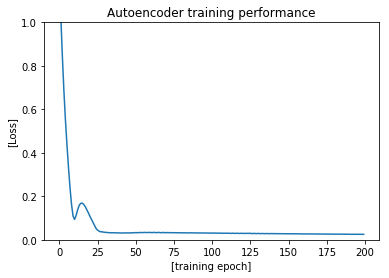

In [228]:
# plot the training progress
plt.plot(range(0, len(train_losses)), train_losses)
plt.xlabel('[training epoch]')
# plt.xlim([0, len(train_losses)])
plt.ylabel('[Loss]')
plt.ylim([0.0, 1.0])
plt.title('Autoencoder training performance')

Text(0.5, 1.0, 'Autoencoder testing performance')

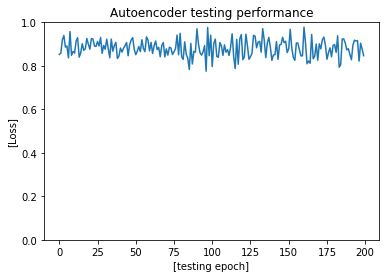

In [231]:
# plot the training progress
plt.plot(range(0, len(test_losses)), test_losses)
plt.xlabel('[testing epoch]')
# plt.xlim([0, len(train_losses)])
plt.ylabel('[Loss]')
plt.ylim([0.0, 1.0])
plt.title('Autoencoder testing performance')